In [1]:
import paper
import database
import importlib
import networkx as nx
from collections import defaultdict

In [51]:
import numpy as np
import networkx as nx
from matplotlib import pyplot as plt

i = 0
names = {}
interactions = np.zeros((5100,5100))
with open('yeast_interactions.txt') as yeast:
    for row in yeast:
        row = row.strip('\n').split(' ')
        
        if i > 0:
            p1, p2 = row[0], row[1]
            for p in [p1,p2]:
                if p not in names:
                    names[p] = len(names)
                    
            if int(row[2]) > 950:
                interactions[names[p1], names[p2]] = row[2]
        if i % 100000 == 0:
            print("progress %:", np.round(i/1657583,2))
        i += 1

progress %: 0.0
progress %: 0.06
progress %: 0.12
progress %: 0.18
progress %: 0.24
progress %: 0.3
progress %: 0.36
progress %: 0.42
progress %: 0.48
progress %: 0.54
progress %: 0.6
progress %: 0.66
progress %: 0.72
progress %: 0.78
progress %: 0.84
progress %: 0.9
progress %: 0.97


Number of proteins: 5100
Number of interactions: 60236
Possible interactions: 26010000
Average degree 11.810980392156862
Graph density: 0.0023


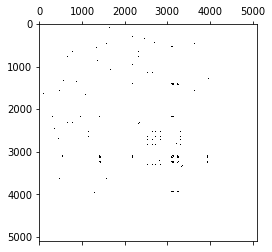

1.0


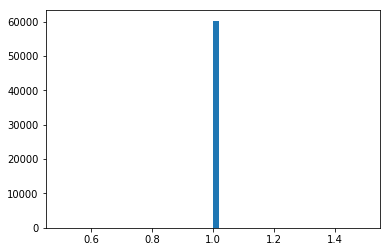

In [52]:
n = len(names)
m = np.count_nonzero(interactions)
interactions[interactions > 0] = 1
print("Number of proteins:", n)
print("Number of interactions:", m)
print("Possible interactions:", n**2)
print("Average degree", m/n)
print("Graph density:", np.round(m/n**2,4))

G = nx.from_numpy_matrix(interactions)
nx.write_gml(G, 'yeast95.gml')

plt.spy(interactions)
plt.show()
print(np.min(np.ravel(interactions[interactions>0])))
plt.hist(np.ravel(interactions[interactions>0]), bins=50)
plt.show()

In [23]:
nx.write_gml(G, "yeast_network.gml")

progress %: 0
progress %: 10000
progress %: 20000
progress %: 30000
progress %: 40000
progress %: 50000
Number of proteins: 444
Number of edges: 1860.0
Possible interactions: 197136
Average degree 4.1891891891891895
Graph density: 0.02
0


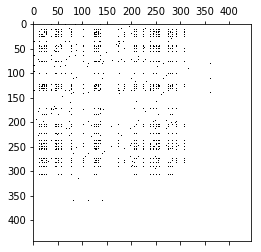

In [42]:
import numpy as np
import networkx as nx
from matplotlib import pyplot as plt

i = 0
names = {}
interactions = np.zeros((444,444))
with open('mycoplasma_genitalium.txt') as f:
    for row in f:
        row = row.strip('\n').split(' ')
        
        if i > 0:
            p1, p2 = row[0], row[1]
            for p in [p1,p2]:
                if p not in names:
                    names[p] = len(names)
            if int(row[2]) > 950:        
                interactions[names[p1], names[p2]] = row[2]
        if i % 10000 == 0:
            print("progress %:", np.round(i,2))
        i += 1
        
n = len(names)
m = np.count_nonzero(interactions)
interactions[interactions > 0] = 1
print("Number of proteins:", n)
print("Number of edges:", 0.5*m)
print("Possible interactions:", n**2)
print("Average degree", 0.5*m/n)
print("Graph density:", np.round(m/n**2,2))

print(np.count_nonzero(np.diag(interactions)))
G = nx.from_numpy_matrix(interactions)
#nx.write_gml(G, 'mycoplasma_genitalium70.gml')

plt.spy(interactions)
plt.show()

In [48]:
print((interactions == interactions.T).all())

True


In [50]:
def write_gml(h2, filename):
    nodes = set()
    edges = set()
    
    def add_node(n, f):
        try:
            if int(h2.node[n]['id']) not in nodes:
                nodes.add(int(h2.node[n]['id']))
                f.write('\n\tnode [ \n\t\tid ' + h2.node[n]['id'] + '\n\t]\n')
            return int(h2.node[n]['id'])
                       
        except:
            print("it broke it:", h2.node[n])
            return -1
                
    def add_edge(source, target, f):
        v1 = add_node(source, f)
        v2 = add_node(target, f)
        if v1 != v2 and v1>=0 and v2>=0 and (v1, v2) not in edges:
            edges.add((v1,v2))
            f.write('\n\tedge [ \n\t\tsource ' + str(v2) + '\n\t\ttarget '
                    + str(v1) + '\n\t]\n')
        
with open("mycoplasma_genitalium95_alt.gml", 'w') as f:

    f.write("graph [\t")
    n = interactions.shape[0]
    for i in range(n):
        f.write('\n\tnode [ \n\t\tid ' + str(i+1) + '\n\t]')
    for i in range(n):
        for j in range(i,n):
            if i == j:
                if interactions[i,j] > 0:
                    print("SELF EDGE OH NO")
            if interactions[i,j] > 0:
                f.write('\n\tedge [ \n\t\tsource ' + str(i+1)
                        + '\n\t\ttarget ' + str(j+1) + '\n\t]\n')
    f.write("]")

In [1]:
importlib.reload(database)
importlib.reload(paper)

db = database.Database()
db.initialize_parents("parents.txt")
db.initialize_children()
#db.print_stats()
db.citation_network("citation_network.gml")

NameError: name 'importlib' is not defined

In [41]:
g = nx.read_gml("citation_network_nx.gml")
db.citation_network("citation_network.gml")

7640 edges written with max_edges = 1000000.0


In [39]:
edges = set()
num_duplicates = 0
node_attrs = nx.get_node_attributes(g,'title')

for u, v in g.edges():
    old_len = len(edges)
    edges.add((u,v))
    if len(edges) == old_len:
        #print(u,v)
        #print(node_attrs[u], node_attrs[v])
        num_duplicates += 1
print(num_duplicates)   

0


In [45]:
db.citation_network("mini_citation_network.gml", max_edges=2)

MAX EDGES REACHED


In [55]:
h = nx.read_pajek("Zewail/Zewail.net")
print(h.number_of_edges())
print(h.number_of_nodes())

h2 = nx.read_pajek("SciMet/SciMet.net")
print(h2.number_of_edges())
print(h2.number_of_nodes())

4581
4123
1781
1625


In [96]:
def write_gml(h2, filename):
    nodes = set()
    edges = set()
    
    def add_node(n, f):
        try:
            if int(h2.node[n]['id']) not in nodes:
                nodes.add(int(h2.node[n]['id']))
                f.write('\n\tnode [ \n\t\tid ' + h2.node[n]['id'] + '\n\t]\n')
            return int(h2.node[n]['id'])
                       
        except:
            print("it broke it:", h2.node[n])
            return -1
                
    def add_edge(source, target, f):
        v1 = add_node(source, f)
        v2 = add_node(target, f)
        if v1 != v2 and v1>=0 and v2>=0 and (v1, v2) not in edges:
            edges.add((v1,v2))
            f.write('\n\tedge [ \n\t\tsource ' + str(v2) + '\n\t\ttarget '
                    + str(v1) + '\n\t]\n')
        
    with open(filename, 'w', errors='backslashreplace') as f:
        
        f.write("graph [\n\tdirected 1\n")
        for n in h2:
            for e in h2[n]:
                add_edge(n, e, f)       
        f.write("]")

In [97]:
write_gml(h2, "sciMet_dataset.gml")
write_gml(h, "zewail_dataset.gml")

it broke it: {}


In [94]:
bases = ["g","pruned","sciMet","zewail","random","degMimic"]
titles = ['""','"Full network (G)"','"Pruned network (P)"', '"SciMet"',
          '"Zewail"','"Random network of same size as G"', 
          '"Random network with same degree sequence as G"']
rows = ['"Vertices"', '"Edges"', '"Diameter"', '"Connected Components"',
        '"Fraction of vertices in giant component"', 
        '"Outdegree Associativity"', '"Indegree Associativity"']

s = 'Export[FileNameJoin[{$HomeDirectory,'
s += '"network-similarity/full_table_raw.txt"}],{\n'
s += '{' + ', '.join(titles) + '},\n'
s += '{"Vertices",'
s += ', '.join(['VertexCount['+bases[i]+']' for i in range(6)]) + '},\n'
s += '{"Edges",'
s += ', '.join(['EdgeCount['+bases[i]+']' for i in range(6)]) + '},\n'
s += '{"Diameter",'
s += ', '.join(['GraphDiameter[UndirectedGraph['+bases[i]+'CC]]' for i in range(6)]) + '},\n'
s += '{"Connected components",'
s += ', '.join(['Length[WeaklyConnectedComponents['+bases[i]+']]' for i in range(6)]) + '},\n'
s += '{"Fraction of vertices in giant component",'
s += ', '.join(['Length[VertexList['+bases[i]+'CC]]/Length[VertexList['+bases[i]+']]//N' for i in range(6)]) + '},\n'
s += '{"Assortativity by indegree",'
s += ', '.join(['GraphAssortativity[ReverseGraph['+bases[i]+']]//N' for i in range(6)]) + '},\n'
s += '{"Assortativity by outdegree",'
s += ', '.join(['GraphAssortativity['+bases[i]+']//N' for i in range(6)]) + '},\n'
s += '{"Assortativity by year",'
s += ', GraphAssortativity[g,"year"]//N},'
s += '{"Assortativity by reference count",'
s += ', GraphAssortativity[g,"referenceCount"]//N},'
s += '{"Assortativity by citation count",'
s += ', GraphAssortativity[g,"citationCount"]//N}}]'
print(s)

Export[FileNameJoin[{$HomeDirectory,"network-similarity/full_table_raw.txt"}],{
{"", "Full network (G)", "Pruned network (P)", "SciMet", "Zewail", "Random network of same size as G", "Random network with same degree sequence as G"},
{"Vertices",VertexCount[g], VertexCount[pruned], VertexCount[sciMet], VertexCount[zewail], VertexCount[random], VertexCount[degMimic]},
{"Edges",EdgeCount[g], EdgeCount[pruned], EdgeCount[sciMet], EdgeCount[zewail], EdgeCount[random], EdgeCount[degMimic]},
{"Diameter",GraphDiameter[UndirectedGraph[gCC]], GraphDiameter[UndirectedGraph[prunedCC]], GraphDiameter[UndirectedGraph[sciMetCC]], GraphDiameter[UndirectedGraph[zewailCC]], GraphDiameter[UndirectedGraph[randomCC]], GraphDiameter[UndirectedGraph[degMimicCC]]},
{"Connected components",Length[WeaklyConnectedComponents[g]], Length[WeaklyConnectedComponents[pruned]], Length[WeaklyConnectedComponents[sciMet]], Length[WeaklyConnectedComponents[zewail]], Length[WeaklyConnectedComponents[random]], Length[WeaklyC

In [34]:
important_all = set()
indegrees = []
outdegrees = []
for rank in ranks:
    node_titles[rank[0]] = rank[1]
    if rank[3] == "indegree":
        indegrees.append(rank[4])
    elif rank[3] == "outdegree":
        outdegrees.append(rank[4])
    if rank[2] == 'pruned':
        important_all.add(rank[0])

important_gA = set()
for rank in ranks:
    if rank[2] == 'gA' and rank[0] in important_all:
        important_gA.add(rank[1])
important_gB = set()
for rank in ranks:
    if rank[2] == 'gB' and rank[0] in important_all:
        important_gB.add(rank[1])


g = 'gB'
node_titles = defaultdict(list)
titles = set()
rankers = ["indegree","outdegree","betweenness","closeness","PageRank"]
tex = "Title & Indegree & Outdegree & Betweenness & Closeness & PageRank \\\\ \hline\n"
for rank in ranks:
    if rank[2] == g:
        node_titles[rank[0]].append(rank)
for node in node_titles:
    data = node_titles[node]
    if data[0][1] in important_gB:
        print(data[0][1])
    row_entries = [data[0][1],"","","","",""]
    for entry in data:
        for i in range(len(rankers)):
            if entry[3] == rankers[i]:
                row_entries[i+1] += str(entry[4])
    tex += " & ".join(row_entries) + " \\\\ \hline\n"
#print(tex)

A graduated assignment algorithm for graph matching
THIRTY YEARS OF GRAPH MATCHING IN PATTERN RECOGNITION
An Algorithm for Subgraph Isomorphism
An eigendecomposition approach to weighted graph matching problems
The Hungarian method for the assignment problem
A distance measure between attributed relational graphs for pattern recognition
Computers and Intractability: A Guide to the Theory of NP-Completeness (Michael R. Garey and David S. Johnson]
Linear time algorithm for isomorphism of planar graphs (Preliminary Report]
Recent developments in graph matching
Graph matching applications in pattern recognition and image processing
Fast and Scalable Approximate Spectral Matching for Higher Order Graph Matching
Efficient Graph Matching Algorithms
The graph matching problem
Unsupervised Domain Adaptation Using Regularized Hyper-Graph Matching
A (sub]graph isomorphism algorithm for matching large graphs
Replicator Equations, Maximal Cliques, and Graph Isomorphism
Error correcting graph matchi

In [53]:
to_read = set()
titles = set()
for p_hash, p in db.all_papers.items():
    titles.add(p.title)
print(titles)
with open('full_table_raw.txt') as input:
    for line in input:
        if line.strip(' ') in titles:
            print("FOUND IT")
        else:
            print("CAN'T FIND IT")

{'Graph matching vs mutual information maximization for object detection', 'Extended Semantic Web Services Model for Automatic Integrated Framework', 'DBpedia - A crystallization point for the Web of Data', 'A gesture interface for human-robot-interaction', 'Finding Minimum-Cost Circulations by Successive Approximation', 'Random graphs with arbitrary degree distributions and their applications', 'Discussion of a set of points in terms of their mutual distances', 'DL-SFA: Deeply-Learned Slow Feature Analysis for Action Recognition', 'Optimal aggregation algorithms for middleware', 'Properties of classical and quantum Jensen-Shannon divergence', 'A Spectral Method for Generating Surrogate Graph Signals', 'A survey of the Predictive Toxicology Challenge 2000-2001', 'On Your Social Network De-anonymizablity: Quantification and Large Scale Evaluation with Seed Knowledge', '3-D Object Recognition Based on Subgraph Matching in Polynomial Time', 'Face alignment by Explicit Shape Regression', '